In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [6]:
data=pd.read_csv(r"C:\Users\Emma\Downloads\heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
heart=data.copy()

In [8]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

# Columns description:

* age - age in years
* sex - (1 = male; 0 = female)
* cp - chest pain type
* trestbps - resting blood pressure (in mm Hg on admission to the hospital)
* chol - serum cholestoral in mg/dl
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg - resting electrocardiographic results
* thalach - maximum heart rate achieved
* exang - exercise induced angina (1 = yes; 0 = no)
* oldpeak - ST depression induced by exercise relative to rest
* slope - the slope of the peak exercise ST segment
* ca - number of major vessels (0-3) colored by flourosopy
* thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
* target - have disease or not (1=yes, 0=no)

In [7]:
heart.shape

(303, 14)

In [8]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
heart.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
heart.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Observation

* The Age ranges from 29- 77 years, most of the patience are below 61years.


In [9]:
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

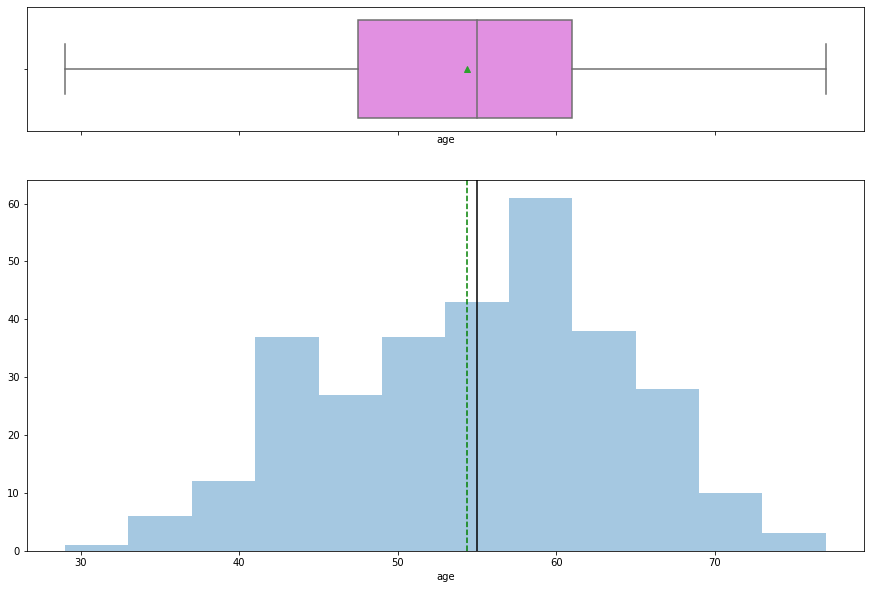

In [26]:
histogram_boxplot(heart['age'])

* The Age data is left skewed
* The mean age is 54 years.
* Majority of the patients are below 61 years to 29years.

## trestbps - resting blood pressure (in mm Hg on admission to the hospital)

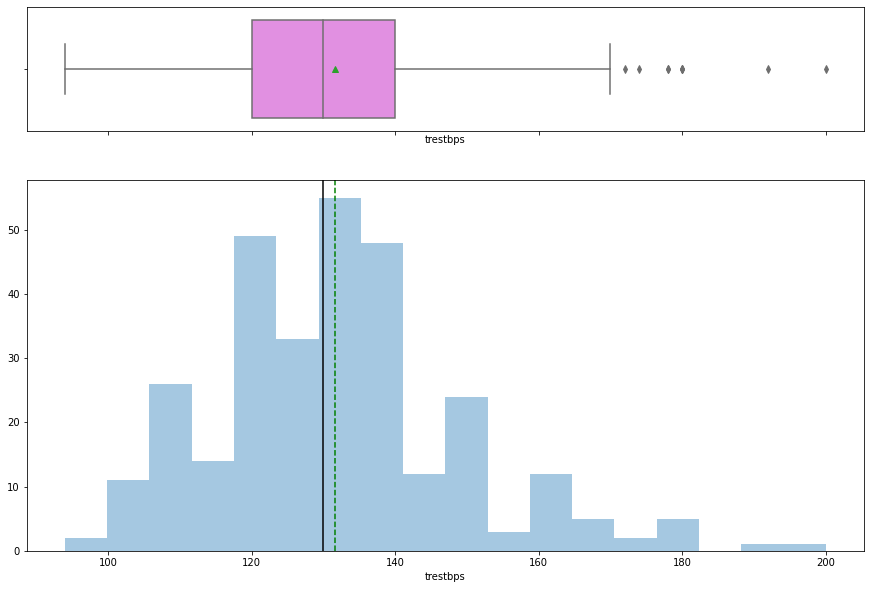

In [13]:
histogram_boxplot(heart['trestbps'])

* There are outliers, and data is slightly right skewed
* Majority of the patients have trestbps of 140mmHg using the boxplot.
* The mean Blood pressure is 131mmHg



## chol - serum cholestoral in mg/dl

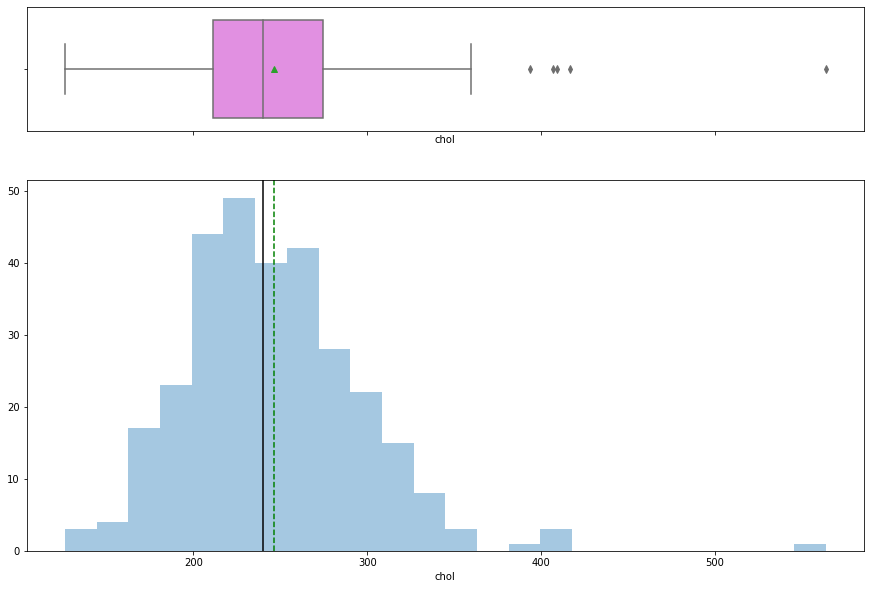

In [14]:
histogram_boxplot(heart['chol'])

* The mean Cholestorol level is 246 mg/dl
* Most of the patients do have Chol level of 274.5 mg/dl

## thalach maximum heart rate achieved

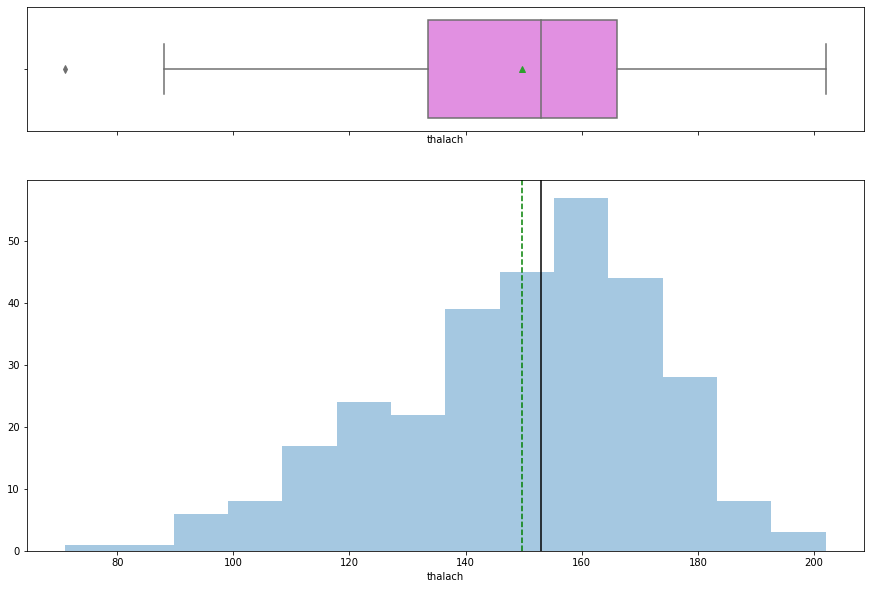

In [15]:
histogram_boxplot(heart['thalach'])

* Data is left skewed
* Most of the Patients have heart rate below 166

## oldpeak

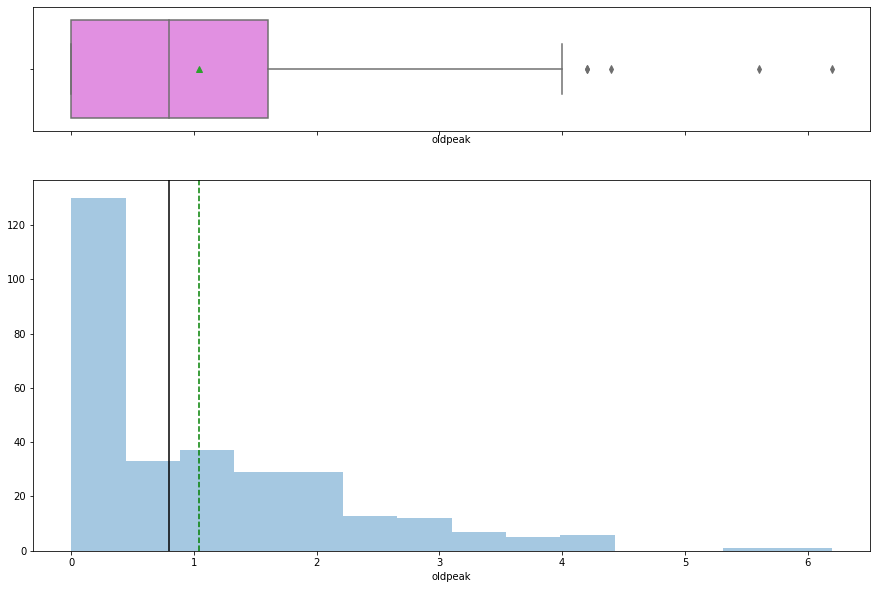

In [16]:
histogram_boxplot(heart['oldpeak'])

* There are outliers is high as 6
* Data is right skewed
* The median ildpeak is around 0.75

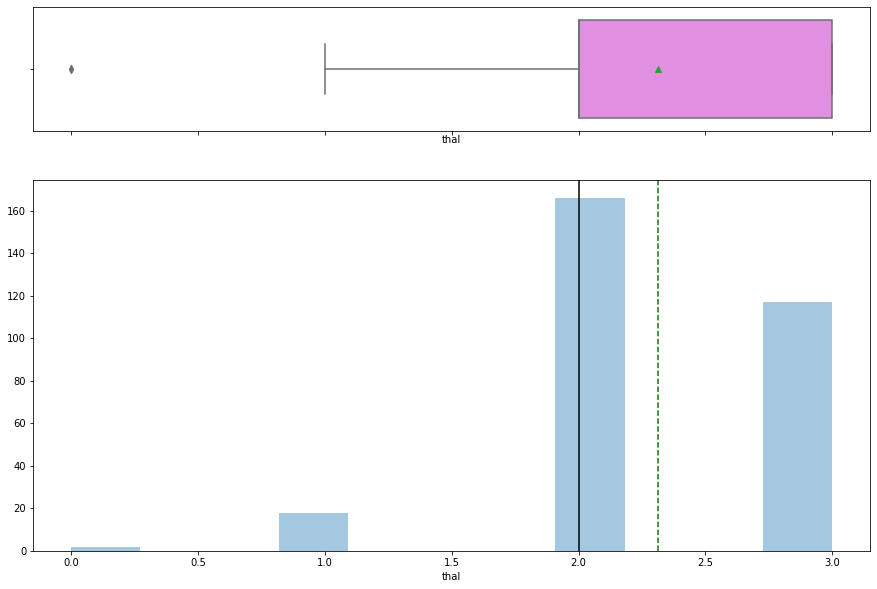

In [24]:
heart['sex']=heart['sex'].astype('category')
heart['exang']=heart['exang'].astype('category')
heart['fbs']=heart['fbs'].astype('category')
heart['target']=heart['target'].astype('category')
heart['ca']=heart['ca'].astype('category')
heart['thal']=heart['thal'].astype('category')

In [25]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    int64   
 1   sex       303 non-null    category
 2   cp        303 non-null    int64   
 3   trestbps  303 non-null    int64   
 4   chol      303 non-null    int64   
 5   fbs       303 non-null    category
 6   restecg   303 non-null    int64   
 7   thalach   303 non-null    int64   
 8   exang     303 non-null    category
 9   oldpeak   303 non-null    float64 
 10  slope     303 non-null    int64   
 11  ca        303 non-null    category
 12  thal      303 non-null    category
 13  target    303 non-null    category
dtypes: category(6), float64(1), int64(7)
memory usage: 21.7 KB


In [30]:
heart.describe(include='category')

,sex,fbs,exang,ca,thal,target
count,303,303,303,303,303,303
unique,2,2,2,5,4,2
top,1,0,0,0,2,1
freq,207,258,204,175,166,165


## DA on categorical data

* There are more Male patients than females; specifically 207 men and 96 women
* Greater number (258) of patients have their Fasting blood sugar less than 120 mg/dl, which means 45 of patients are  presumably diabetic.
* 204 of the patients do not have an Exercised induced angina.
* Majority of the patients (175) have the heart colored 0
* 166 patients have thal level of 2.
* 165 patients have heart disease while 138 of don't.

In [29]:
heatmap

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [77]:
def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

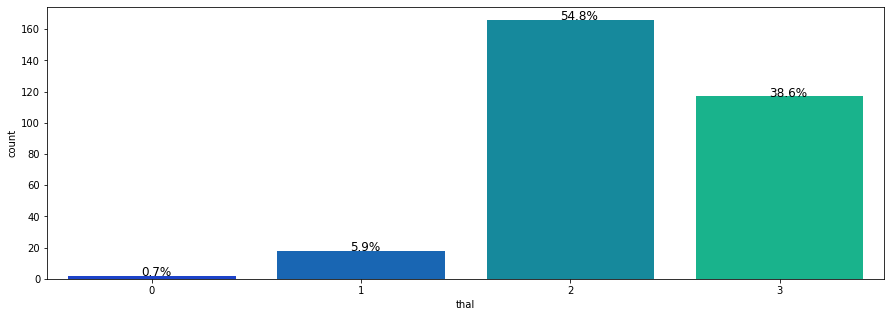

In [33]:
plt.figure(figsize=(15,5))
ax = sns.countplot(heart["thal"],palette='winter')
perc_on_bar(ax,heart["thal"])

* Thal level of 2 is the highest (54.8%) closely followed by level 3 with 38.6%

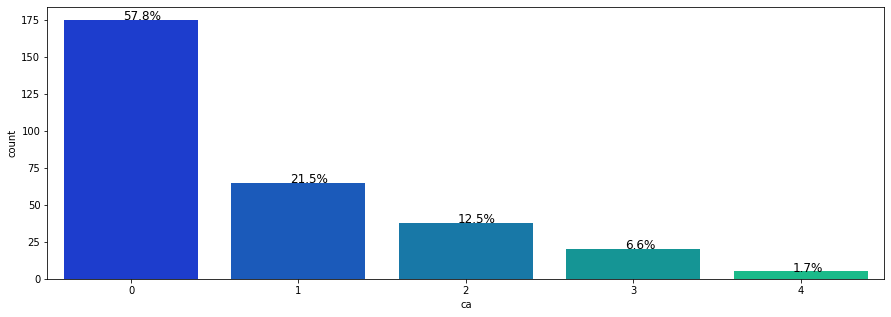

In [34]:
plt.figure(figsize=(15,5))
ax = sns.countplot(heart["ca"],palette='winter')
perc_on_bar(ax,heart["ca"])

* Greater number of patients have vessels colored 0, with 57.8%

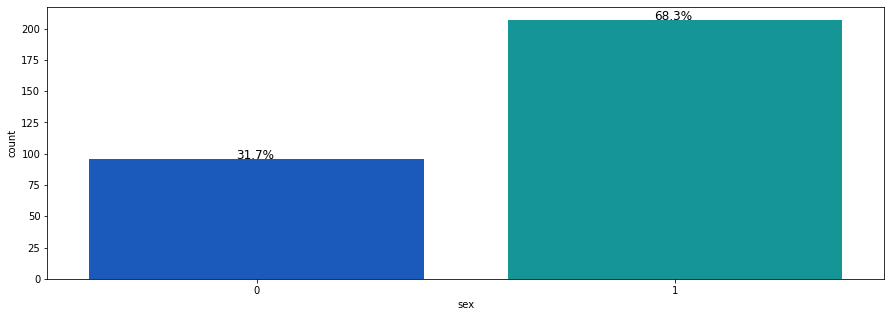

In [35]:
plt.figure(figsize=(15,5))
ax = sns.countplot(heart["sex"],palette='winter')
perc_on_bar(ax,heart["sex"])

* According data, there are more Male (68.3%) patients than female (31.7%)

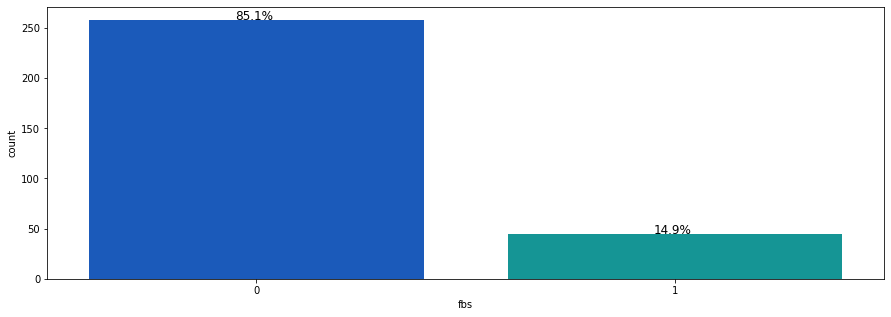

In [36]:
plt.figure(figsize=(15,5))
ax = sns.countplot(heart["fbs"],palette='winter')
perc_on_bar(ax,heart["fbs"])

* Majority of the patients (85.1%) have their fbs less than 120 mg/dl, while 14.9% have it greater than 120 mg/dl

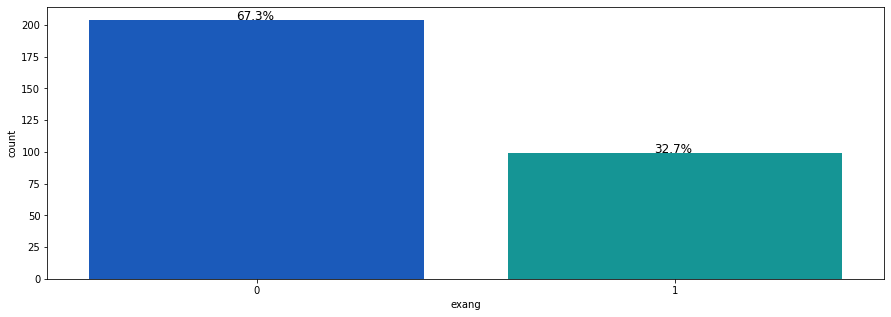

In [37]:
plt.figure(figsize=(15,5))
ax = sns.countplot(heart["exang"],palette='winter')
perc_on_bar(ax,heart["exang"])

* 67.3% of patients **are not** on exercised induced agina, while 32.7% are on induced agina.

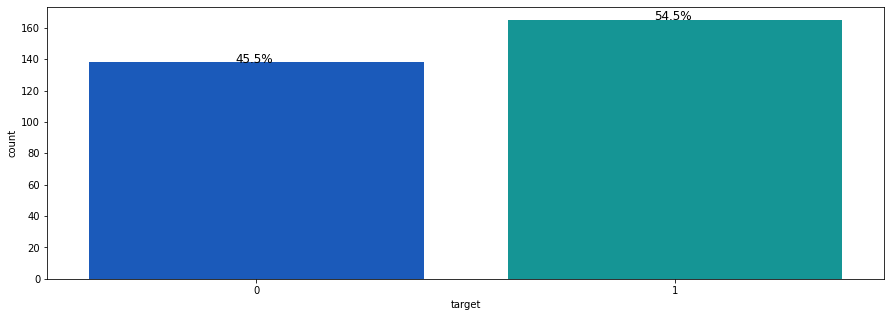

In [39]:
plt.figure(figsize=(15,5))
ax = sns.countplot(heart["target"],palette='winter')
perc_on_bar(ax,heart["target"])

* 54.5% of the patients have heart disease while 45.5% are free from it.

## Bivariate Analysis

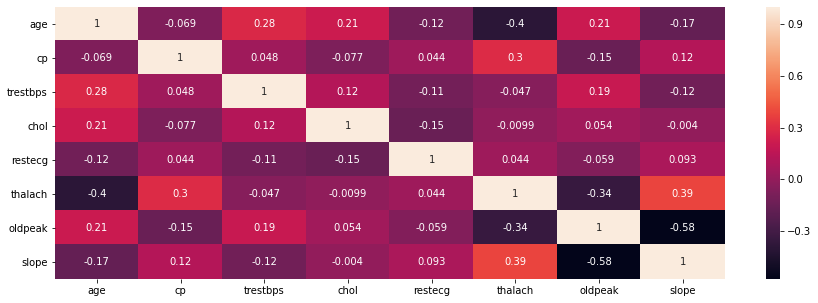

In [49]:
plt.figure(figsize=(15,5))
sns.heatmap(heart.corr(), annot= True)
plt.show()

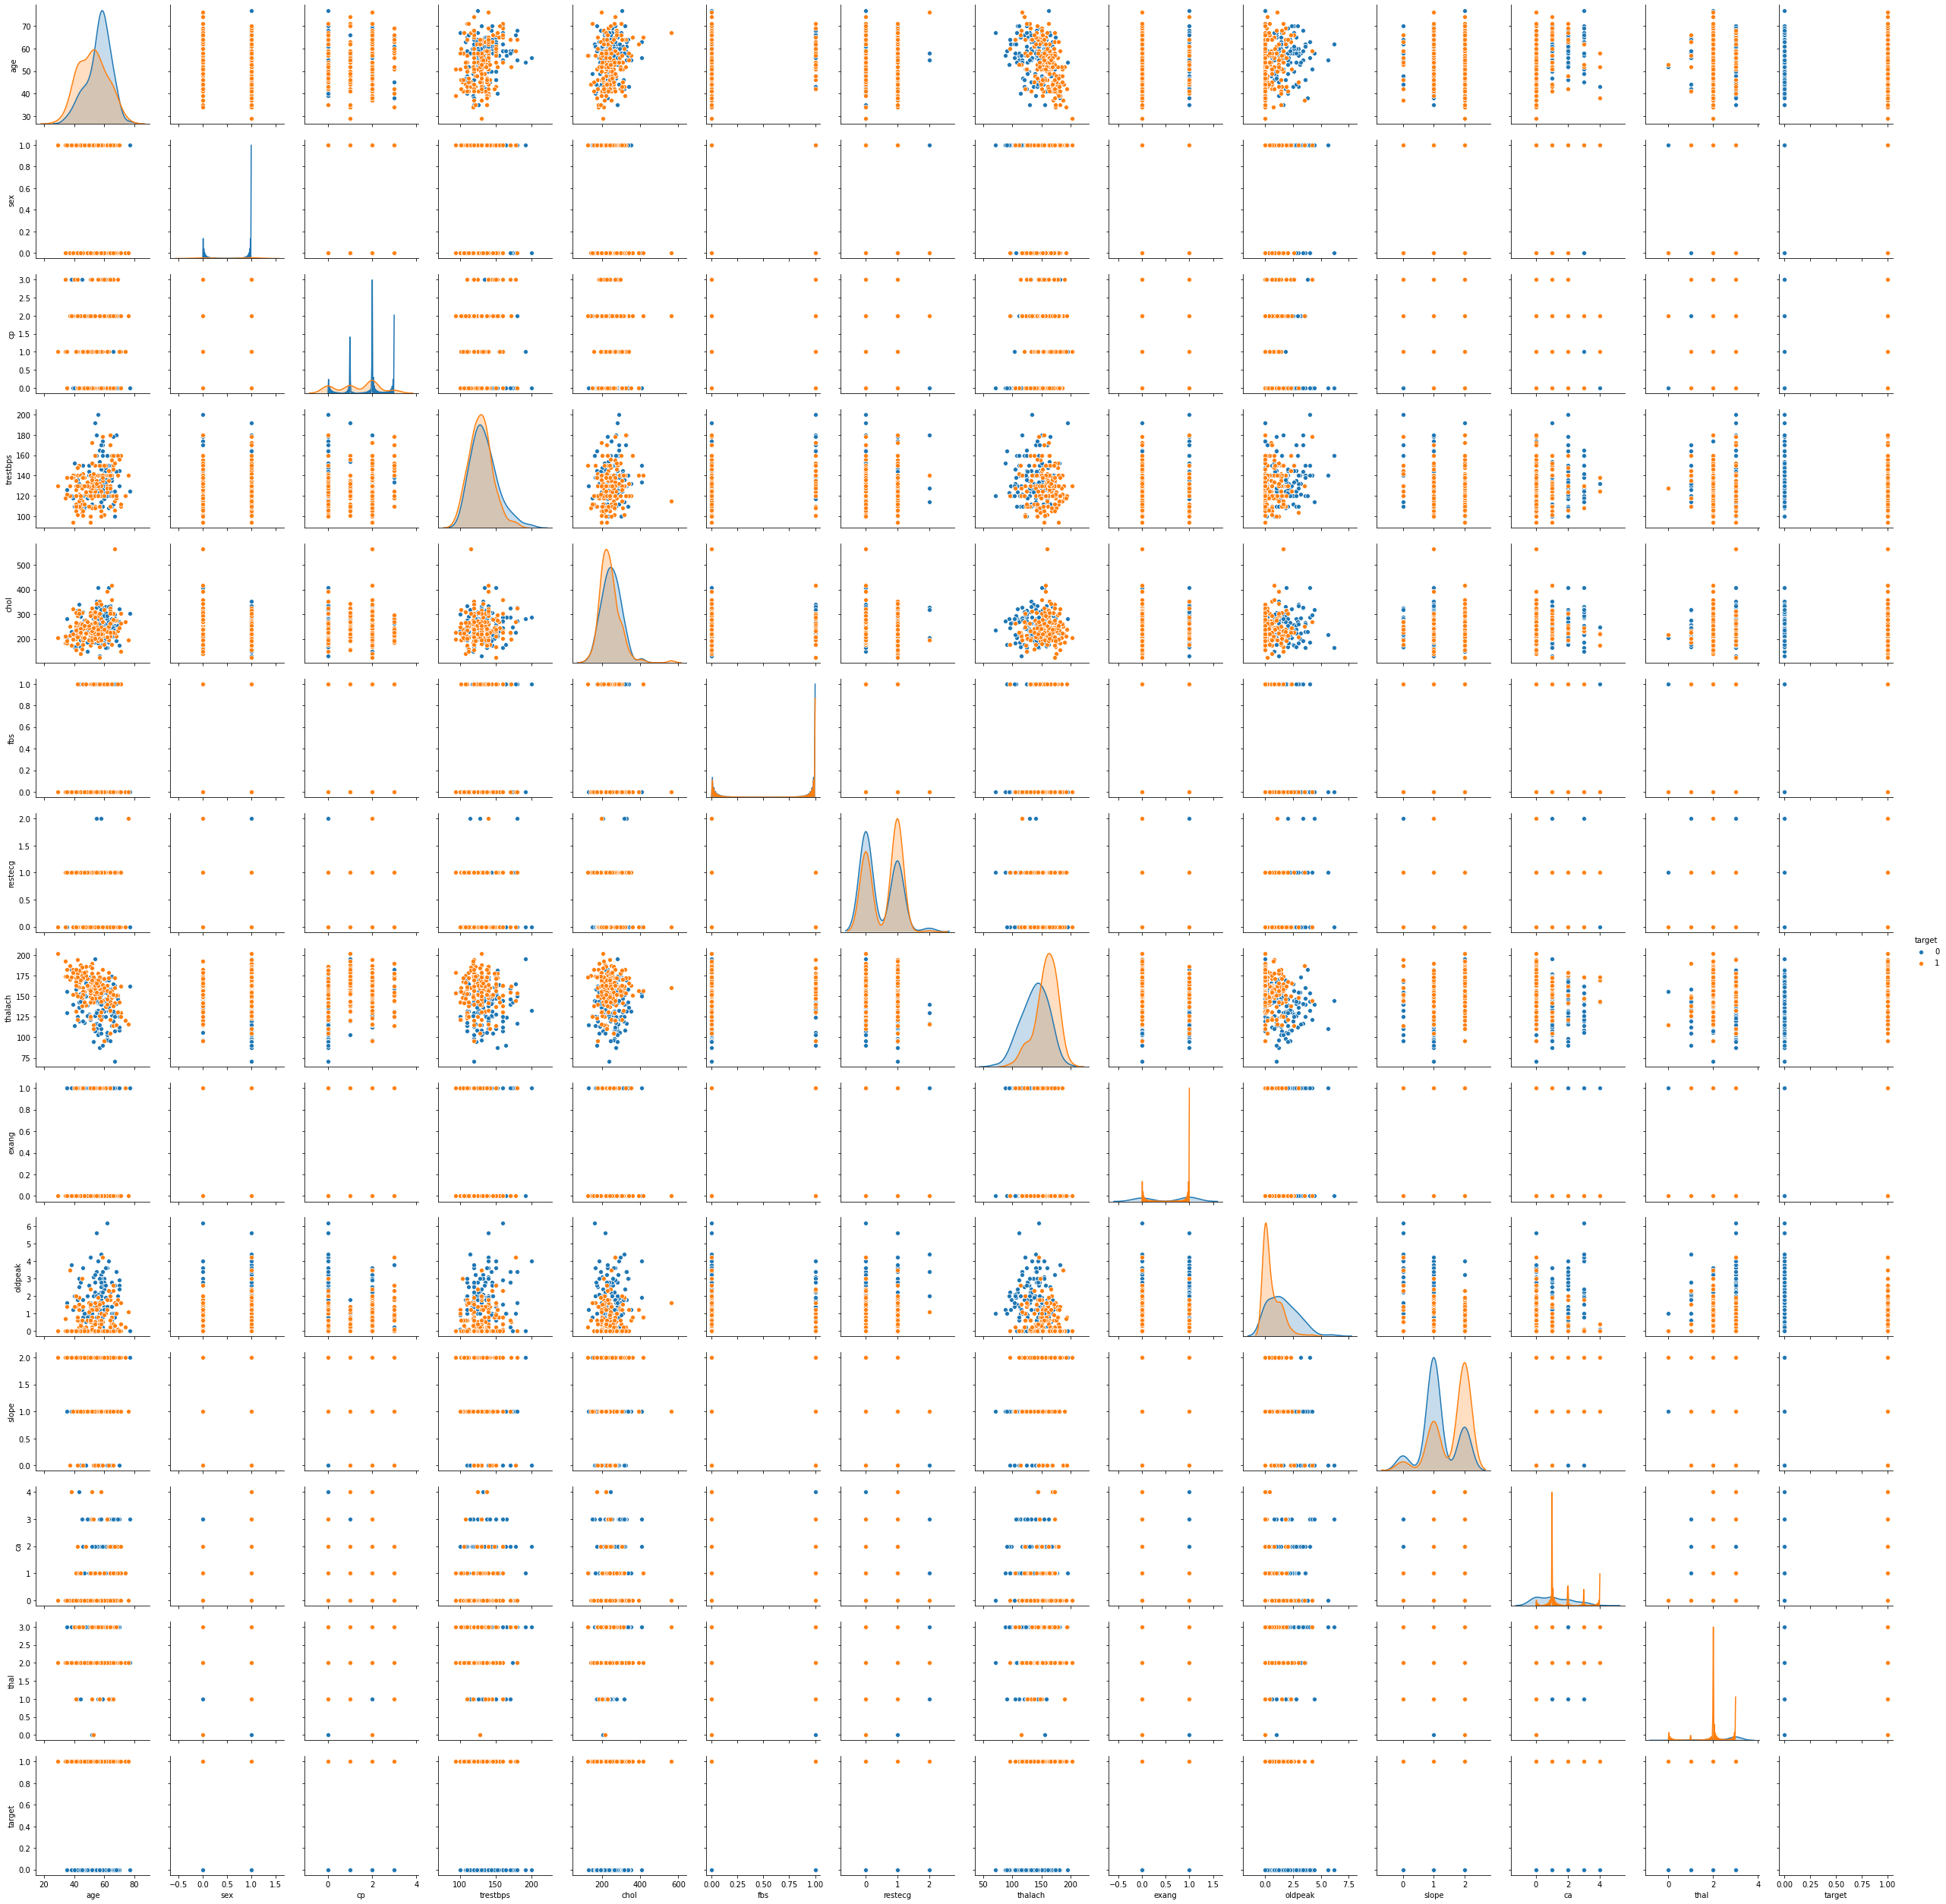

In [58]:
sns.pairplot(data=heart , hue='target')
plt.show()

####     'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      
This density plot show a varying distribution that needs further investigation

In [60]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [69]:
heart[heart['sex']==1].describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,207.000000,207.0,207.000000,207.000000,207.000000,207.0,207.000000,207.000000,207.0,207.000000,207.000000,207.0,207.0,207.0
unique,NaN,1.0,NaN,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,5.0,4.0,2.0
top,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,3.0,0.0
freq,NaN,207.0,NaN,NaN,NaN,174.0,NaN,NaN,130.0,NaN,NaN,111.0,102.0,114.0
mean,53.758454,NaN,0.932367,130.946860,239.289855,NaN,0.507246,148.961353,NaN,1.115459,1.386473,NaN,NaN,NaN
std,8.883803,NaN,1.059064,16.658246,42.782392,NaN,0.510754,24.130882,NaN,1.174632,0.627378,NaN,NaN,NaN
min,29.000000,NaN,0.000000,94.000000,126.000000,NaN,0.000000,71.000000,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,47.000000,NaN,0.000000,120.000000,208.000000,NaN,0.000000,132.000000,NaN,0.000000,1.000000,NaN,NaN,NaN
50%,54.000000,NaN,0.000000,130.000000,235.000000,NaN,1.000000,151.000000,NaN,0.800000,1.000000,NaN,NaN,NaN
75%,59.500000,NaN,2.000000,140.000000,268.000000,NaN,1.000000,168.000000,NaN,1.800000,2.000000,NaN,NaN,NaN


## Understanding Male patients based on criteria's and Target

* 114 of the male patient out of 303 don't have heart disease


In [62]:
heart[heart['sex']==0].describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,96.000000,96.0,96.000000,96.000000,96.000000,96.0,96.000000,96.000000,96.0,96.000000,96.000000,96.0,96.0,96.0
unique,NaN,1.0,NaN,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,4.0,4.0,2.0
top,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,2.0,1.0
freq,NaN,96.0,NaN,NaN,NaN,84.0,NaN,NaN,74.0,NaN,NaN,64.0,79.0,72.0
mean,55.677083,NaN,1.041667,133.083333,261.302083,NaN,0.572917,151.125000,NaN,0.876042,1.427083,NaN,NaN,NaN
std,9.409396,NaN,0.972427,19.311119,65.088946,NaN,0.557150,20.047969,NaN,1.119844,0.593736,NaN,NaN,NaN
min,34.000000,NaN,0.000000,94.000000,141.000000,NaN,0.000000,96.000000,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,49.750000,NaN,0.000000,120.000000,214.750000,NaN,0.000000,141.250000,NaN,0.000000,1.000000,NaN,NaN,NaN
50%,57.000000,NaN,1.000000,131.000000,253.000000,NaN,1.000000,157.000000,NaN,0.600000,1.000000,NaN,NaN,NaN
75%,63.000000,NaN,2.000000,140.000000,296.750000,NaN,1.000000,165.000000,NaN,1.400000,2.000000,NaN,NaN,NaN


## Gender vs Target

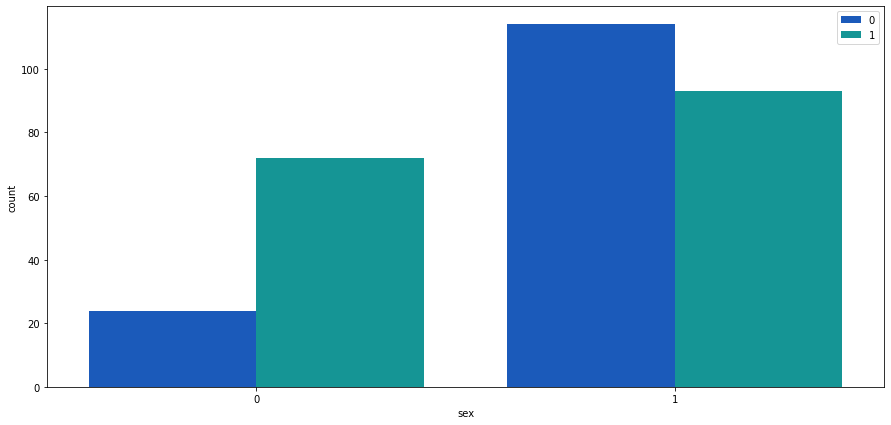

In [68]:
plt.figure(figsize=(15,7))
sns.countplot(heart["sex"],hue=heart["target"],palette='winter')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* The Male patients; **114 of them, which is greater than the rest of the men don't have heart disease**. **93** of them unfortunately **have heart disease**.

* Female patients; **a greater number of them do have heart disease, 72** of them , while **24 of them don't have heart disease**.

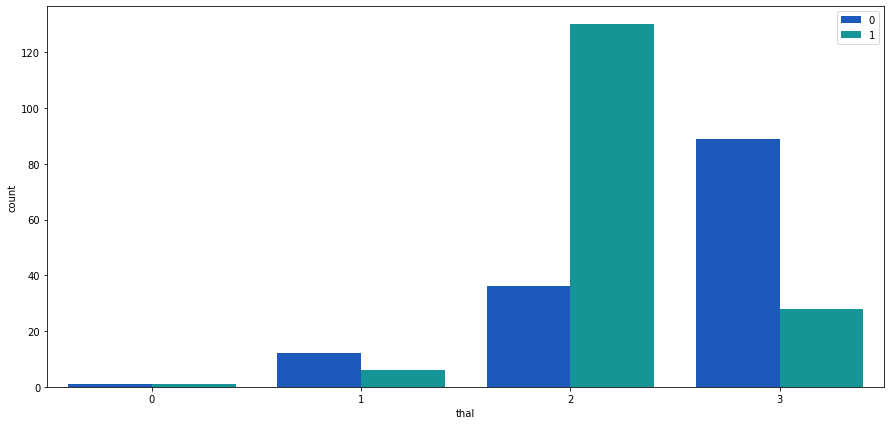

In [87]:
plt.figure(figsize=(15,7))
sns.countplot(heart["thal"],hue=heart["target"],palette='winter')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

## Number of Major Vessels (ca) VS Target

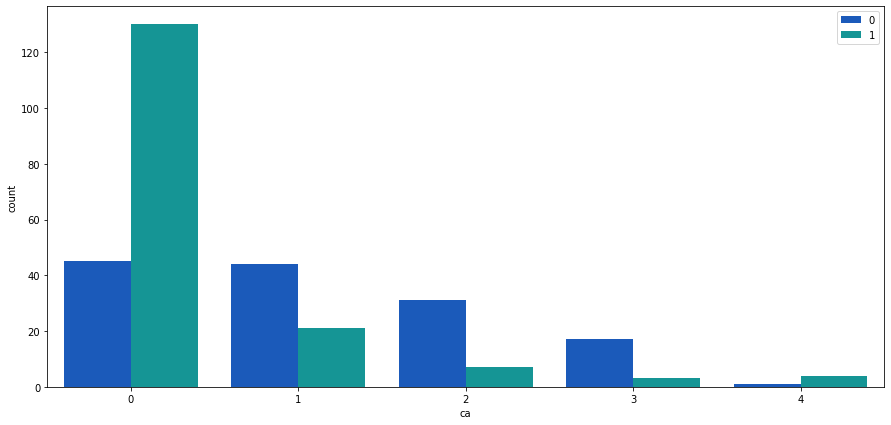

In [72]:
plt.figure(figsize=(15,7))
sns.countplot(heart["ca"],hue=heart["target"],palette='winter')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* Those in level 0 in ca are highly susceptible in having heart disease

## FBS VS Target

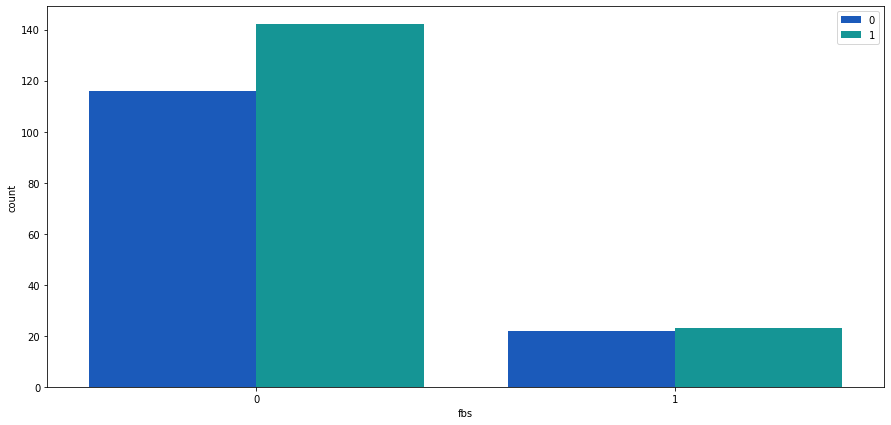

In [73]:
plt.figure(figsize=(15,7))
sns.countplot(heart["fbs"],hue=heart["target"],palette='winter')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* Patients with fasting blood sugar greater than 120mg/dl don't seem to show high risk of heart disease. Perhaps due to density of majority with fbs less than 120mg/dl.Although approximately 110 of them in with less fbs of 120mg/dl do not have heart disease,however, 143 have them in this category have the illness. Therefore **23 patients with fbs > 120mg/dl and 143 patients with fbs < 120mg/dl, a total of 165 of them are seen to have it. This should be further investigated**.

## Chest Pain vs Heart Disease

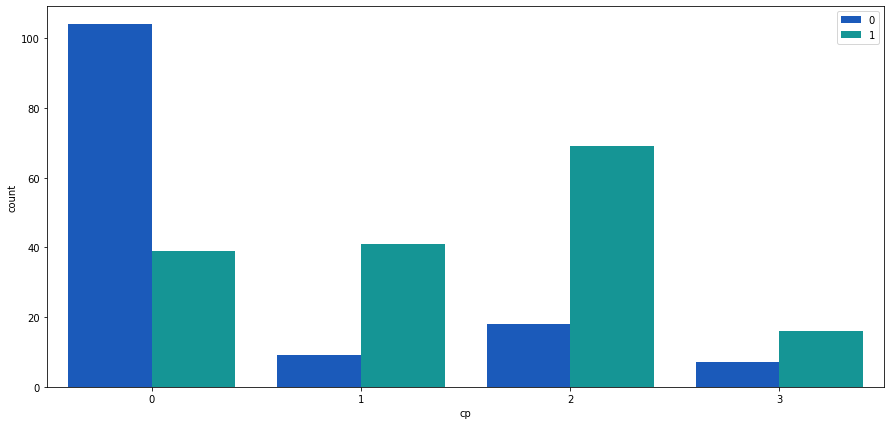

In [10]:
plt.figure(figsize=(15,7))
sns.countplot(heart["cp"],hue=heart["target"],palette='winter')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

## Oldpeak vs Slope vs Target

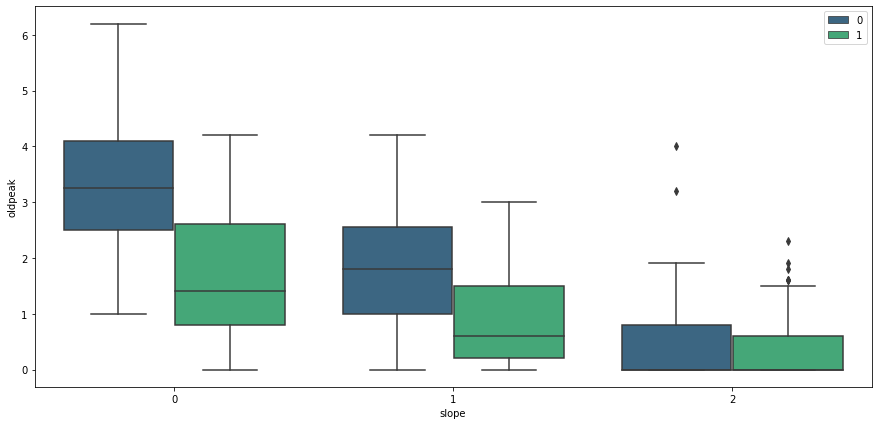

In [94]:
plt.figure(figsize=(15,7))
sns.boxplot(heart["slope"],heart["oldpeak"],hue=heart["target"],palette="viridis")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

## Ages vs Sex vs Target

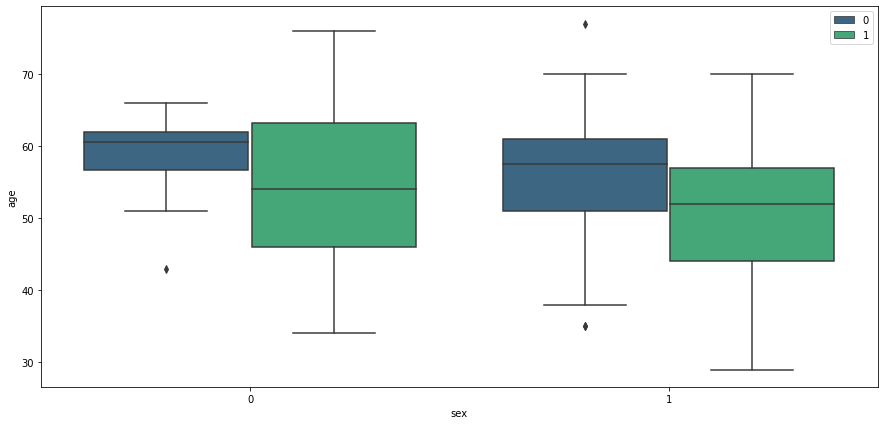

In [85]:
plt.figure(figsize=(15,7))
sns.boxplot(heart["sex"],heart["age"],hue=heart["target"],palette="viridis")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* The age of male patients with heart disease is approx. between 45-55 years, while others without the disease are in a age bracket of 51-60 years, although couple outliers are observed.

* Female patients with heart disease are approx. of Ages 48-63 years.Those free from the disease are between 58-63 years, and some few outliers about far below min expected age of approx. 42years.

In [86]:
heart[heart['target']==1].describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,165.000000,165.0,165.000000,165.000000,165.000000,165.0,165.000000,165.000000,165.0,165.000000,165.000000,165.0,165.0,165.0
unique,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,5.0,4.0,1.0
top,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,2.0,1.0
freq,NaN,93.0,NaN,NaN,NaN,142.0,NaN,NaN,142.0,NaN,NaN,130.0,130.0,165.0
mean,52.496970,NaN,1.375758,129.303030,242.230303,NaN,0.593939,158.466667,NaN,0.583030,1.593939,NaN,NaN,NaN
std,9.550651,NaN,0.952222,16.169613,53.552872,NaN,0.504818,19.174276,NaN,0.780683,0.593635,NaN,NaN,NaN
min,29.000000,NaN,0.000000,94.000000,126.000000,NaN,0.000000,96.000000,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,44.000000,NaN,1.000000,120.000000,208.000000,NaN,0.000000,149.000000,NaN,0.000000,1.000000,NaN,NaN,NaN
50%,52.000000,NaN,2.000000,130.000000,234.000000,NaN,1.000000,161.000000,NaN,0.200000,2.000000,NaN,NaN,NaN
75%,59.000000,NaN,2.000000,140.000000,267.000000,NaN,1.000000,172.000000,NaN,1.000000,2.000000,NaN,NaN,NaN


## Observations on patients with Heart Disease.

* The median Age of patients with Heart disease is 52 years.
* Men are highly affected by the disease,specifically 93 of them, while 72 are female patients. 
* The mean Resting blood pressure of patients associated with heart disease is 129.3- This show's those with HBP are mostly affected with this specific heart conundrum.
* Cholestorol median level of patients is 234.
* In FBS this is quite interesting cause those with fbs < 120mg/dl are more stricken with the illness (143) compared to 23 patients with fbs > 120mg/dl. A total 165 cases with heart disease.
* 142 without exercise induced angina are highly seen to have heart disease, while 23 with exercise induced angina are seen with the disease. This can be said that those involved in one or two physical activities tend not have heart disease problems.  A total of 165 in this test sadly have heart disease.
* In ca, type '0' vessel seems to be the most affected with heart disease. A total of 130 patients.
* In Thal, 130 patients